In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp

## Equations

In [15]:
# def S(Vm, thresh):
#     if Vm < thresh:
#         return 0
#     else:
#         return 1

def S(t, t_pool, s_pool):
    # if (50 < t) and (t < 70):
    if int(t) in t_pool:
        if len(s_pool) == 1:
            s = s_pool[0]
        else:
            s = s_pool[int(t)//20 - 1]
        return s
    else: 
        return 0
    
    # return 1

def returns_dvdt(V, t, tm, tk, bk, ek, tex, sigmaex, eex, t_pool, s_pool):
    vm, gk, gex = V

    return [(1/tm)*(-vm - gk*(vm - ek) - gex*(vm - eex)),                        # dVm/dt
            (1/tk)*(-gk + bk*S(t, t_pool, s_pool)),                              # dgk/dt 
            (1/tex)*(-gex + sigmaex*S(t, t_pool, s_pool))]                       # dgex/dt

In [3]:
def run_cell(ode, ics, t, params, cell_type, color, sim_name):
    sol = odeint(ode, ics, t, params)

    vm = sol[:,0]
    gk = sol[:,1]
    gex = sol[:,2]

    fig, axs = plt.subplots(3, 1)
    axs = axs.ravel()

    axs[0].plot(t, vm, color=color)
    # axs[0].set_ylabel('Voltage (mV)')
    axs[0].set_title(f'{cell_type} Voltage')
    axs[1].plot(t, gk, color=color)
    # axs[1].set_xlabel('Time (ms)')
    axs[1].set_title('Potassium Conductance')
    axs[2].plot(t, gex, color=color)
    axs[2].set_xlabel('Time (ms)')
    axs[2].set_title('Excitatory Synapse Conductance')

    fig.suptitle(sim_name)
    fig.tight_layout()


In [4]:
dt = 0.1
ts = np.arange(0, 100, dt)

## Input

### Single Spike

In [5]:
t_single = [50]
s_single = [np.random.randint(1,200)]

for t_i, s_i in zip(t_single, s_single):
    print(f'{s_i} spikes at {t_i}s')

197 spikes at 50s


### Spike Train

In [18]:
t_train = [20*i for i in range(1,6)]
s_train = [np.random.randint(1,200) for i in t_train]
s_train = [150 for i in range(5)]

for t_i, s_i in zip(t_train, s_train):
    print(f'{s_i} spikes at {t_i}s')

150 spikes at 20s
150 spikes at 40s
150 spikes at 60s
150 spikes at 80s
150 spikes at 100s


## Principal Cell

In [7]:
# parameters
tm = 10
thresh = 7.5
bk = 2
tk = 1
ek = -10
tex = 10
sigmaex = 0.25  ## AN->P
eex = 70

# initial conditions
v0 = -60
gk0 = 0
gex0 = 0

### Single Spike

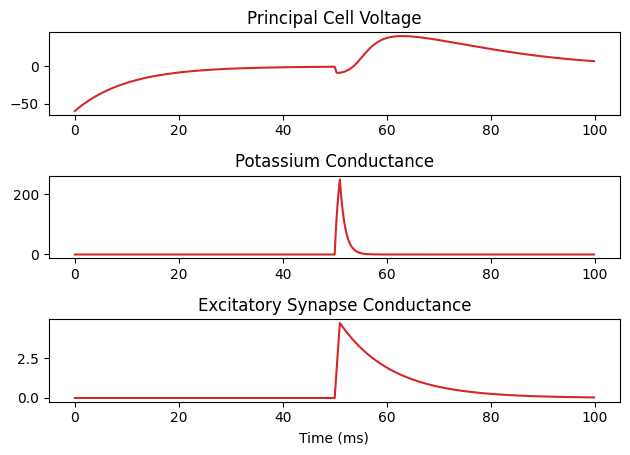

In [8]:
run_cell(returns_dvdt, [v0, gk0, gex0], ts, (tm, tk, bk, ek, tex, sigmaex, eex, t_single, s_single), 'Principal Cell', 'tab:red', '')

### Spike Train

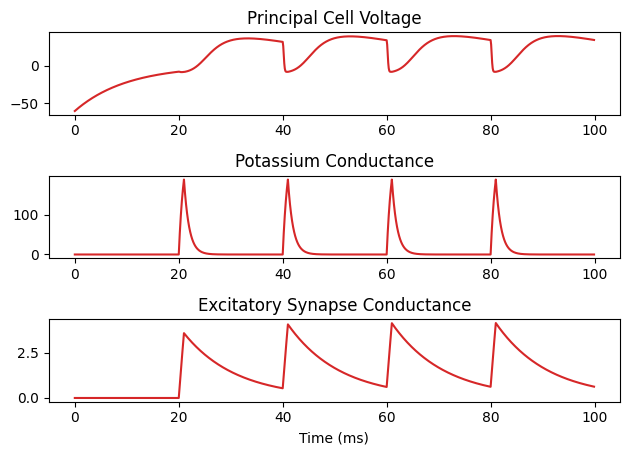

In [19]:
run_cell(returns_dvdt, (v0, gk0, gex0), ts, (tm, tk, bk, ek, tex, sigmaex, eex, t_train, s_train), 'Principal Cell', 'tab:red', '')

### Inactive

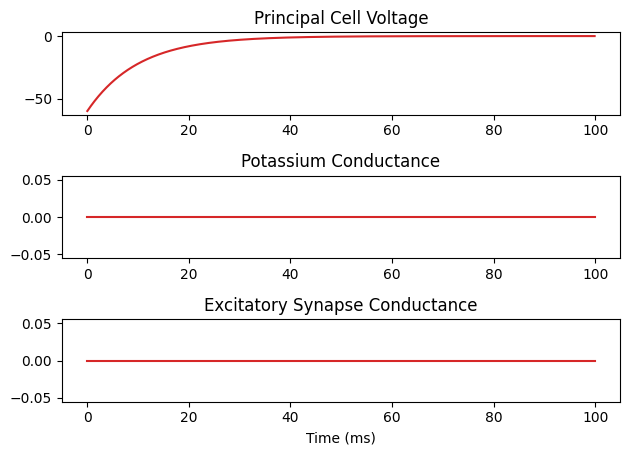

In [10]:
bk = 0
sigmaex = 0
run_cell(returns_dvdt, (v0, gk0, gex0), ts, (tm, tk, bk, ek, tex, sigmaex, eex, t_train, s_train), 'Principal Cell', 'tab:red', '')


## Wideband Inhibitor

In [11]:
# parameters
tm = 5
thresh = 4
bk = 2
tk = 1
ek = -10
tex = 10
sigmaex = 0.06  ## AN->W
eex = 70

# initial conditions
v0 = -60
gk0 = 0
gex0 = 0


### Single Spike

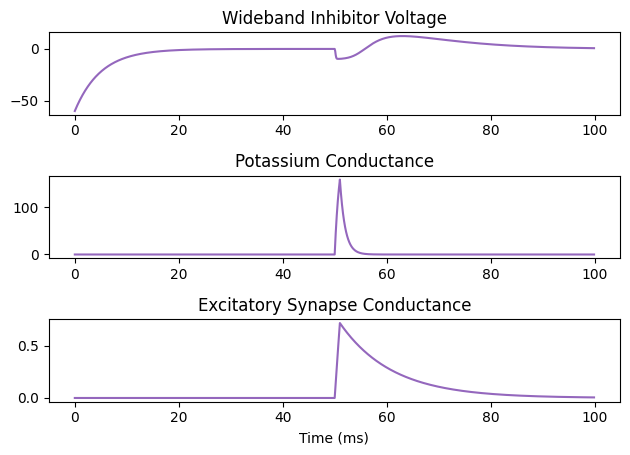

In [12]:
run_cell(returns_dvdt, (v0, gk0, gex0), ts, (tm, tk, bk, ek, tex, sigmaex, eex, t_single, s_single), 'Wideband Inhibitor', 'tab:purple', '')

### Spike Train

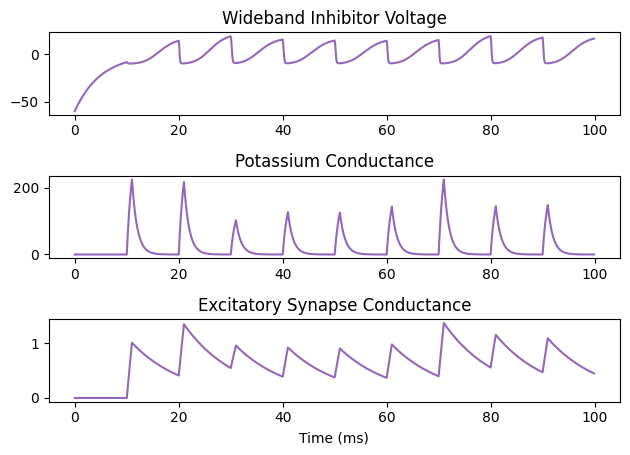

In [13]:
run_cell(returns_dvdt, (v0, gk0, gex0), ts, (tm, tk, bk, ek, tex, sigmaex, eex, t_train, s_train), 'Wideband Inhibitor', 'tab:purple', '')

### Inactive

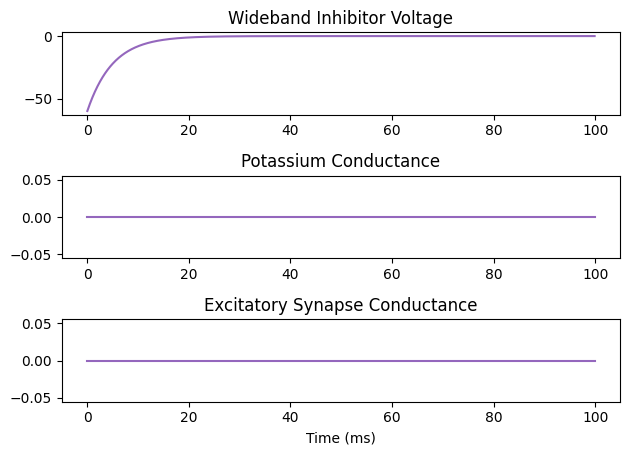

In [14]:
bk = 0
sigmaex = 0
run_cell(returns_dvdt, (v0, gk0, gex0), ts, (tm, tk, bk, ek, tex, sigmaex, eex, t_train, s_train), 'Wideband Inhibitor', 'tab:purple', '')


## Narrowband Inhibitor (I2)

In [15]:
# parameters
tm = 6
thresh = 14.5
bk = 1.75
tk = 1
ek = -10
tex = 10
sigmaex = 0.55  ## AN->I2
eex = 70

# initial conditions
v0 = -60
gk0 = 0
gex0 = 0

### Single Spike

In [16]:
t_single

[50]

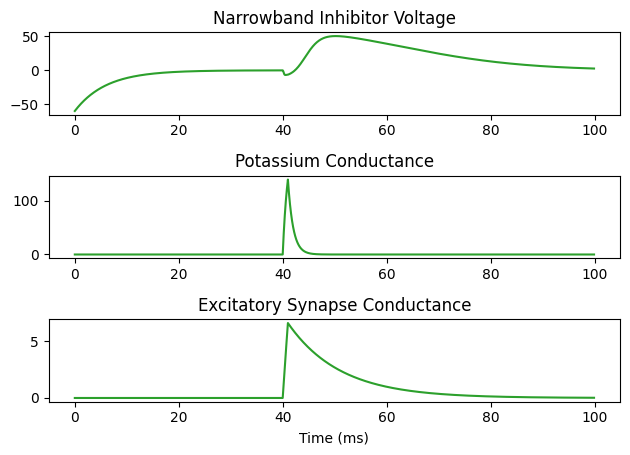

In [ ]:
t_single = [40]
run_cell(returns_dvdt, (v0, gk0, gex0), ts, (tm, tk, bk, ek, tex, sigmaex, eex, t_single, s_single), 'Narrowband Inhibitor', 'tab:green', '')

### Spike Train

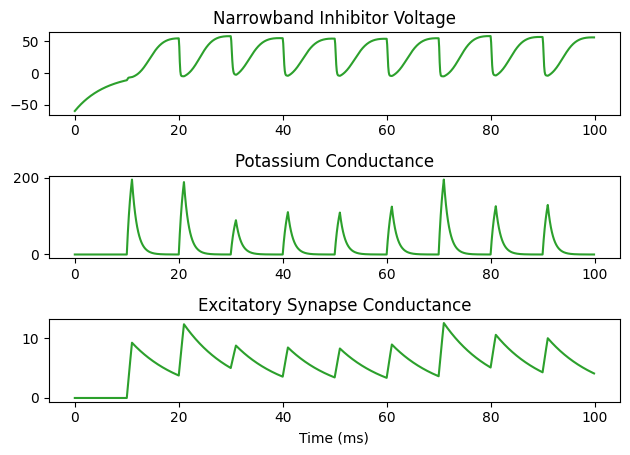

In [18]:
run_cell(returns_dvdt, (v0, gk0, gex0), ts, (tm, tk, bk, ek, tex, sigmaex, eex, t_train, s_train), 'Narrowband Inhibitor', 'tab:green', '')

### Inactive

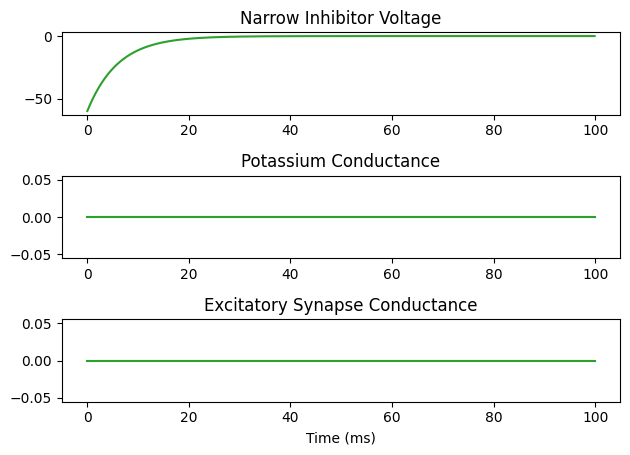

In [19]:
bk = 0
sigmaex = 0
run_cell(returns_dvdt, (v0, gk0, gex0), ts, (tm, tk, bk, ek, tex, sigmaex, eex, t_train, s_train), 'Narrow Inhibitor', 'tab:green', '')
